<a href="https://colab.research.google.com/github/AnnaKraim/ML/blob/main/lin_regression_flats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
df = pd.read_csv('flats.csv',index_col='n').dropna()

In [ ]:
df.head()

,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
n,,,,,,,,,,
1.0,75.0,44.0,28.0,6,"13,5",7.0,1.0,0.0,1.0,6.0
2.0,95.0,61.0,37.0,6,"13,5",7.0,1.0,0.0,1.0,1.0
3.0,88.0,55.0,36.0,6,9,5.0,1.0,1.0,0.0,4.0
4.0,225.0,80.0,56.0,9,9,5.0,1.0,1.0,1.0,3.0
5.0,140.0,86.0,51.0,10,"12,7",10.0,1.0,0.0,1.0,5.0


In [ ]:
df.tail()

,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
n,,,,,,,,,,
996.0,97.0,72.0,43.0,10,"12,7",10.0,0.0,0.0,1.0,5.0
997.0,95.0,60.0,43.0,6,9,5.0,0.0,0.0,1.0,4.0
998.0,95.0,60.0,46.0,5,"10,5",5.0,1.0,0.0,1.0,7.0
999.0,129.0,76.0,48.0,10,"12,5",5.0,0.0,0.0,1.0,3.0
1000.0,103.0,64.0,45.0,7,"15,5",5.0,1.0,0.0,1.0,1.0


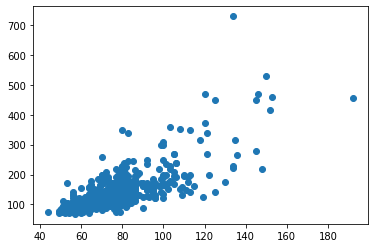

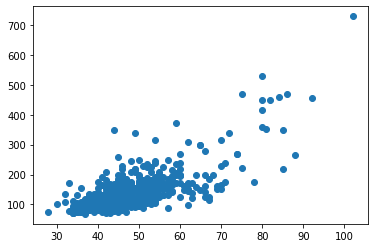

In [ ]:
plt.scatter(df['totsp'], df['price'])
plt.show()
plt.scatter(df['livesp'], df['price'])
plt.show()


In [ ]:
def lin_reg(x, y):
  chsl = (y * x).mean() - x.mean() * y.mean()
  znm = (x * x).mean() - x.mean() * x.mean()
  k = chsl / znm
  b = y.mean() - k * x.mean()
  return k, b

In [ ]:
x = np.array([1, 2, 3, 4])
y = 2* x + 1
lin_reg(x, y)

(2.0, 1.0)

In [ ]:
k, b = lin_reg(df['totsp'], df['price'])
y_totsp = df['totsp'] * k + b


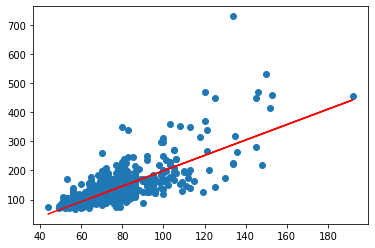

In [ ]:
plt.scatter(df['totsp'], df['price'])
plt.plot(df['totsp'], y_totsp, c='r')
plt.show()

In [ ]:
k, b = lin_reg(df['livesp'], df['price'])
y_livsp = df['livesp'] * k + b

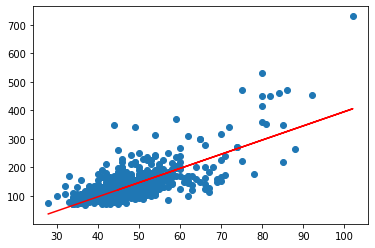

In [ ]:
plt.scatter(df['livesp'], df['price'])
plt.plot(df['livesp'], y_livsp, c='r')
plt.show()

Какая модель лучше ?

Что такое **лучше** ?

Нам нужна **метрика** для измерения качества регрессии. 

Обычно используется MSE = Среднее значение квадратичных отклонений (y_pred[i] - y[i])^2

In [ ]:
def mse(y_true, y_pred):
  return ((y_true - y_pred) ** 2).mean()

In [ ]:
mse(df['price'], y_livsp)

1353.044230569924

In [ ]:
mse(df['price'], y_totsp)

1285.6791744073007

In [ ]:
1285.6791744073007 ** (1/2)

35.85636867290525

In [ ]:
1353.044230569924 ** (1/ 2)

36.783749544736786

r2 или R квадрат, метрика от 0 до 1, можно интерпретировать как процент объясненных ответов

In [ ]:
def r2(y_true, y_pred):
  ss_tot = ((y_true - y_true.mean()) ** 2).sum()
  ss_reg =  ((y_true - y_pred) ** 2).sum()
  return 1 - ss_reg / ss_tot


In [ ]:
r2(df['price'], y_livsp)

0.5568141632379027

In [ ]:
r2(df['price'], y_totsp)

0.5788793981425899

In [ ]:
r2(df['price'], df['price'])

1.0

In [ ]:
r2(df['price'], np.random.rand(len(df['price'])))

-5.340421808160949

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(df['price'], np.random.rand(len(df['price'])))

-5.341902555150378

In [ ]:
from sklearn.model_selection import train_test_split

def print_score(x, y):
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
  k, b = lin_reg(X_train, y_train)
  y_pred_train = k * X_train + b
  y_pred_test = k * X_test + b
  print("Test:", mse(y_test, y_pred_test), r2(y_test, y_pred_test))
  print("Train: ", mse(y_train, y_pred_train), r2(y_train, y_pred_train))


In [ ]:
print_score(df['livesp'], df['price'])

Test: 1452.6008578511844 0.5106328855818296
Train:  1308.2368535117614 0.5771202262380615


In [ ]:
print_score(df['totsp'], df['price'])

Test: 1343.8357727440396 0.547274785908852
Train:  1258.4185085092079 0.5932237096457658


Посчитаем коофициент корреляции - значение от -1 до 1, чем больше по модулю, тем лучше.

[Ссылка](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D1%8F#%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D1%8B%D0%B9_%D0%BA%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%BA%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D0%B8)

In [ ]:
for name in df.columns:

  print(name, df[name].corr(df['price']))

price 1.0
totsp 0.7608412437181562
livesp 0.7461998145523107


TypeError: ignored

Нашли ошибку в данных, нужно предобработать два столбца:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1000 entries, 1.0 to 1000.0
Data columns (total 10 columns):
price       1000 non-null float64
totsp       1000 non-null float64
livesp      1000 non-null float64
kitsp       1000 non-null object
dist        1000 non-null object
metrdist    1000 non-null float64
walk        1000 non-null float64
brick       1000 non-null float64
floor       1000 non-null float64
code        1000 non-null float64
dtypes: float64(8), object(2)
memory usage: 125.9+ KB


In [ ]:
df['kitsp'] = df['kitsp'].apply(lambda x: x.replace(',', '.')).astype(float)
df['dist'] = df['dist'].apply(lambda x: x.replace(',', '.')).astype(float)

In [ ]:
for name in df.columns:

  print(name, df[name].corr(df['price']))

price 1.0
totsp 0.7608412437181562
livesp 0.7461998145523107
kitsp 0.5879451466994732
dist -0.32420073120898774
metrdist -0.1431235285659631
walk 0.17775382228208275
brick 0.24847794044266372
floor 0.13400145092093874
code -0.08227178863387395


Поработаем с множественной линейной регрессией

In [ ]:
X = df.drop(columns='price')
# Единичный признак (смещение) (+b)
y = df['price']
X.head()


,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
n,,,,,,,,,
1.0,44.0,28.0,6.0,13.5,7.0,1.0,0.0,1.0,6.0
2.0,61.0,37.0,6.0,13.5,7.0,1.0,0.0,1.0,1.0
3.0,55.0,36.0,6.0,9.0,5.0,1.0,1.0,0.0,4.0
4.0,80.0,56.0,9.0,9.0,5.0,1.0,1.0,1.0,3.0
5.0,86.0,51.0,10.0,12.7,10.0,1.0,0.0,1.0,5.0


In [ ]:
w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
w
# w = (X.T * X)-1 * Xt * y

array([ 1.62951381,  1.18712217,  1.15140072, -3.78592597, -1.34826887,
        7.88588009,  7.0515584 ,  3.02006905, -3.12310314])

In [ ]:
class LinearRegression:
  def __init__(self):
    self.w = None
  def fit(self, X, y):
    X = X.copy()
    # Единичный признак
    X['one'] = 1
    self.w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
  def predict(self, X):
    X = X.copy()
    X['one'] = 1
    return X.dot(self.w)


In [ ]:
lr = LinearRegression()
lr.fit(X, y)


In [ ]:
y_pred = lr.predict(X)

In [ ]:
mse(y, y_pred)

1063.6705070318612

In [ ]:
r2(y, y_pred)

0.6515977134764346

In [ ]:
for i, x in enumerate(X.columns):
  print(x, lr.w[i])
print(lr.w[-1])

livesp 3.6089691127241665
kitsp 4.746281970483096
dist -2.679573309300146
metrdist -1.0978757509841977
walk 9.40352803074897
brick 6.872609143810874
floor 5.340507572539051
code -2.11390467451454
-46.95476256312089


Использование линейной регрессии из sklearn

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = lr.predict(X)
mse(y, y_pred), r2(y, y_pred)

(1063.6705070318615, 0.6515977134764346)

Как получить кооэфициенты ?

In [ ]:
lr.coef_, lr.intercept_

(array([ 3.60896911,  4.74628197, -2.67957331, -1.09787575,  9.40352803,
         6.87260914,  5.34050757, -2.11390467]), -46.954762563119175)

In [ ]:
from sklearn.model_selection import cross_val_score
lr = LinearRegression(normalize=True)
# R2 score default
cross_val_score(lr, X, y).mean()

0.6306548238833021

In [ ]:
from sklearn.metrics import mean_squared_error, make_scorer
cross_val_score(lr, X, y, scoring=make_scorer(mean_squared_error)).mean()

1126.4124542670465

In [ ]:
lr.fit(X, y)
lr.coef_

array([ 3.60896911,  4.74628197, -2.67957331, -1.09787575,  9.40352803,
        6.87260914,  5.34050757, -2.11390467])